感谢来自于网络的peijie同学提供的素材

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import Dataset, AbcClassifier, VisDecision
np.random.seed(42)

## Generate Data
<p>
<font size="3">
    The dataset can be generated by the provided utility function <b>Dataset</b> in utils.py. 
</font>

In [2]:
from sklearn import datasets

def make_dataset(n_samples=1500, n_features=2, n_classes=2, noise=0.3, seed=1):
    X, y = datasets.make_classification(n_samples=n_samples,
                                        n_features=n_features, 
                                        n_classes=n_classes,
                                        n_informative=1,
                                        n_redundant=0, 
                                        n_clusters_per_class=1, 
                                        random_state=seed)
    rng = np.random.RandomState(seed)
    X += noise * rng.uniform(size=X.shape)
    y = 2 * y - 1 
    return X, y

In [3]:
n_samples = 1000
n_features = 2
n_classes = 2
noise = 0.05
seed = 0
X, y = make_dataset(n_samples, n_features, n_classes, noise, seed)

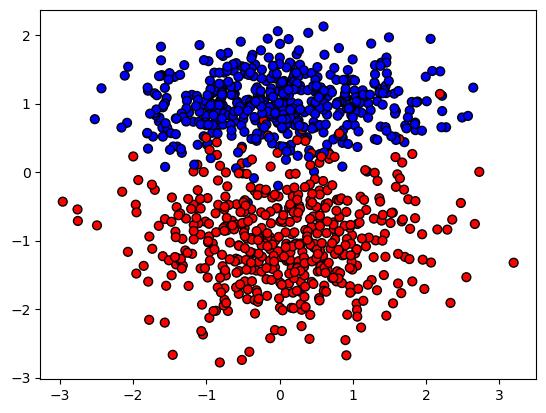

In [4]:
from matplotlib.colors import ListedColormap
plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=ListedColormap(["#FF0000", "#0000FF"]), edgecolors="k")

## Linear Regression/Classification

\begin{align*}
    \mathcal{L}(w) &= \frac{1}{2} \sum_{i=1}^{N} (y_i - w^T x_i)^2 \\
    &= \frac{1}{2} (Xw - y)^T (Xw - y) \\
    &= \frac{1}{2} (w^T X^T X w - 2w^T X^T y + y^T y)
\end{align*}

\begin{align*}
    \nabla_w \mathcal{L}(w) = X^T X w - X^T y=0 \\
    w=(X^TX)^{-1}X^Ty
\end{align*}

## Close form Solution
<p>
<font size="3">
        Each customized machine learning method must be a subclass of the <b>AbcClassifier</b> in utils.py. One must overwrite the <b>fit</b> function (serving as training step) and <b>predict</b> function (serving as predicting step) to make it work. In addition, one can add proper class attributes to <b>__init__</b> function for class constructor. 
</font>

In [ ]:
class LinearClassifier(AbcClassifier):
    def __init__(self):
        super().__init__()
        
    def fit(self, X, y):
        X, y = super().fit(X, y)
        n, d = X.shape
        X = np.hstack((X, np.ones((n, 1))))
        # 通过np的线性代数求伪逆的算法实现求解参数w，和上述的公式相对应
        self.w = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)
        
        # Return the classifier
        return self
    
    def predict(self, X):
        X = super().predict(X)
        
        n, d = X.shape
        X = np.hstack((X, np.ones((n, 1))))
        y_pred = np.sign(X.dot(self.w))
        
        return y_pred      

In [6]:
clf = LinearClassifier().fit(X, y)
print(f"Accuracy= {clf.score(X, y)*100:.2f}%")

Accuracy= 95.80%


## Visualize the result

<AxesSubplot:title={'center':'Decision Boundary'}, xlabel='X1', ylabel='X2'>

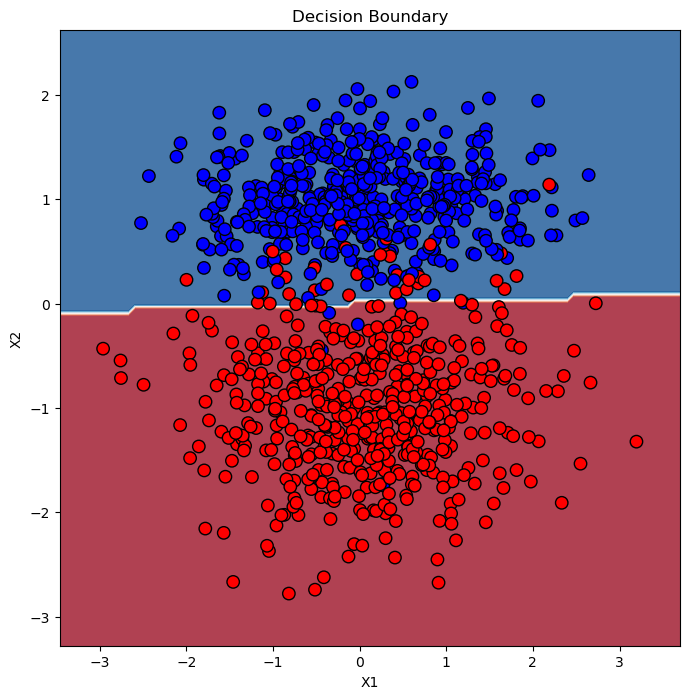

In [7]:
VisDecision(clf, response_method='predict').plot(X, y)